In [1]:
import pandas as pd
import test
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split

# 데이터 불러오기
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 데이터 확인
train_shape = train_df.shape
test_shape = test_df.shape

train_df.info()
print(train_shape)


test_df.info()
print(test_shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

train = 1460개의 항목, 81개의 컬럼  
test = 1459개의 항목, 80개의 칼럼  

In [2]:
# 변수별 결측치 확인 후, 적절한 방법(평균/최빈값/“없음” 처리 등) 선택
# 결측치 확인
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# 결과 출력
train_shape, test_shape, missing_values

((1460, 81),
 (1459, 80),
 PoolQC          1453
 MiscFeature     1406
 Alley           1369
 Fence           1179
 MasVnrType       872
 FireplaceQu      690
 LotFrontage      259
 GarageType        81
 GarageYrBlt       81
 GarageFinish      81
 GarageQual        81
 GarageCond        81
 BsmtExposure      38
 BsmtFinType2      38
 BsmtQual          37
 BsmtCond          37
 BsmtFinType1      37
 MasVnrArea         8
 Electrical         1
 dtype: int64)

데이터 결측치 처리 참고 : https://zhining.tistory.com/27  
 PoolQC          1453  
 MiscFeature     1406  
 Alley           1369  
 Fence           1179  
 MasVnrType       872  
해당 데이터들의 결측치가 50% 이상이라서 drop으로 제거한다.  

In [3]:
# 변수별 결측치 확인 후, 적절한 방법(평균/최빈값/“없음” 처리 등) 선택
train_df.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence"], axis=1, errors="ignore", inplace=True)
test_df.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence"], axis=1, errors="ignore", inplace=True)

print(train_df.columns)
print(test_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

결측치 제거 참고 : https://cheris8.github.io/data%20analysis/DP-NA-Imputation/  
  
train과 test 데이터에서 결측치가 50% 이상 넘는 컬럼을 삭제하고 나머지 값들로 진행.  
  
- PoolQC : 수영장 품질 (거의 결측)  
- MiscFeature : 특이한 추가 시설 (거의 없음)  
- Alley : 뒷골목 여부 (대부분 결측)  
- Fence : 울타리 정보 (많은 데이터가 없음)  
  
axis = 1 : 열(컬럼)을 삭제하겠다는 의미 (행 삭제는 axis=0)  
errors = "ignore" : 삭제할려는 컬럼이 없어도 에러를 발생시키지 않음  
inplace = True : 원본 데이터프레임(train_df)을 직접 수정  

변수 처리 참고 : https://dining-developer.tistory.com/20  

In [4]:
# 범주형 변수(예: Neighborhood, GarageType 등)는 One-Hot Encoding(또는 Label Encoding)
categorical_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond", 
                    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                    "MasVnrType"]

# 범주형 변수 결측치 처리 ("None"으로 대체)
for col in categorical_cols:
    train_df[col] = train_df[col].fillna("None")
    test_df[col] = test_df[col].fillna("None")

# 수치형 변수 결측치 처리 (중앙값으로 대체)
muneriacal_cols = ["LotFrontage", "GarageYrBlt", "MasVnrArea"]

for col in muneriacal_cols:
    median_value = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_value)
    test_df[col] = test_df[col].fillna(median_value)

# Electrical [1개만 결측] -> 최빈값으로 대체
train_df["Electrical"] = train_df["Electrical"].fillna(train_df["Electrical"].mode()[0])

missing_values_ater = train_df.isnull().sum().sum()

missing_values_ater

np.int64(690)

categorical_cols 리스트에 결측치를 처리할 범주형 변수(문자형 변수) 목록을 저장 (데이터 타입이 object인 컬럼들)  
for 반복문으로 모든 컬럼의 결측치를 처리함.  
결측값을 None으로 채움 (의미 있는 값으로 변경)  
  
numrical_cols 리스트에 수치형 변수 중 결측치를 처리할 컬럼을 저장  
.median() -> 중앙값(median)을 구해서 결측치를 대체  
.fillne(median_value) -> 결측치를 중앙값(극단값이 있어도 대표값을 잘 나타내기때문)으로 채움  
  
참고 : https://m.blog.naver.com/upennsolution/221713078940  
참고 : https://jamm-notnull.tistory.com/12  


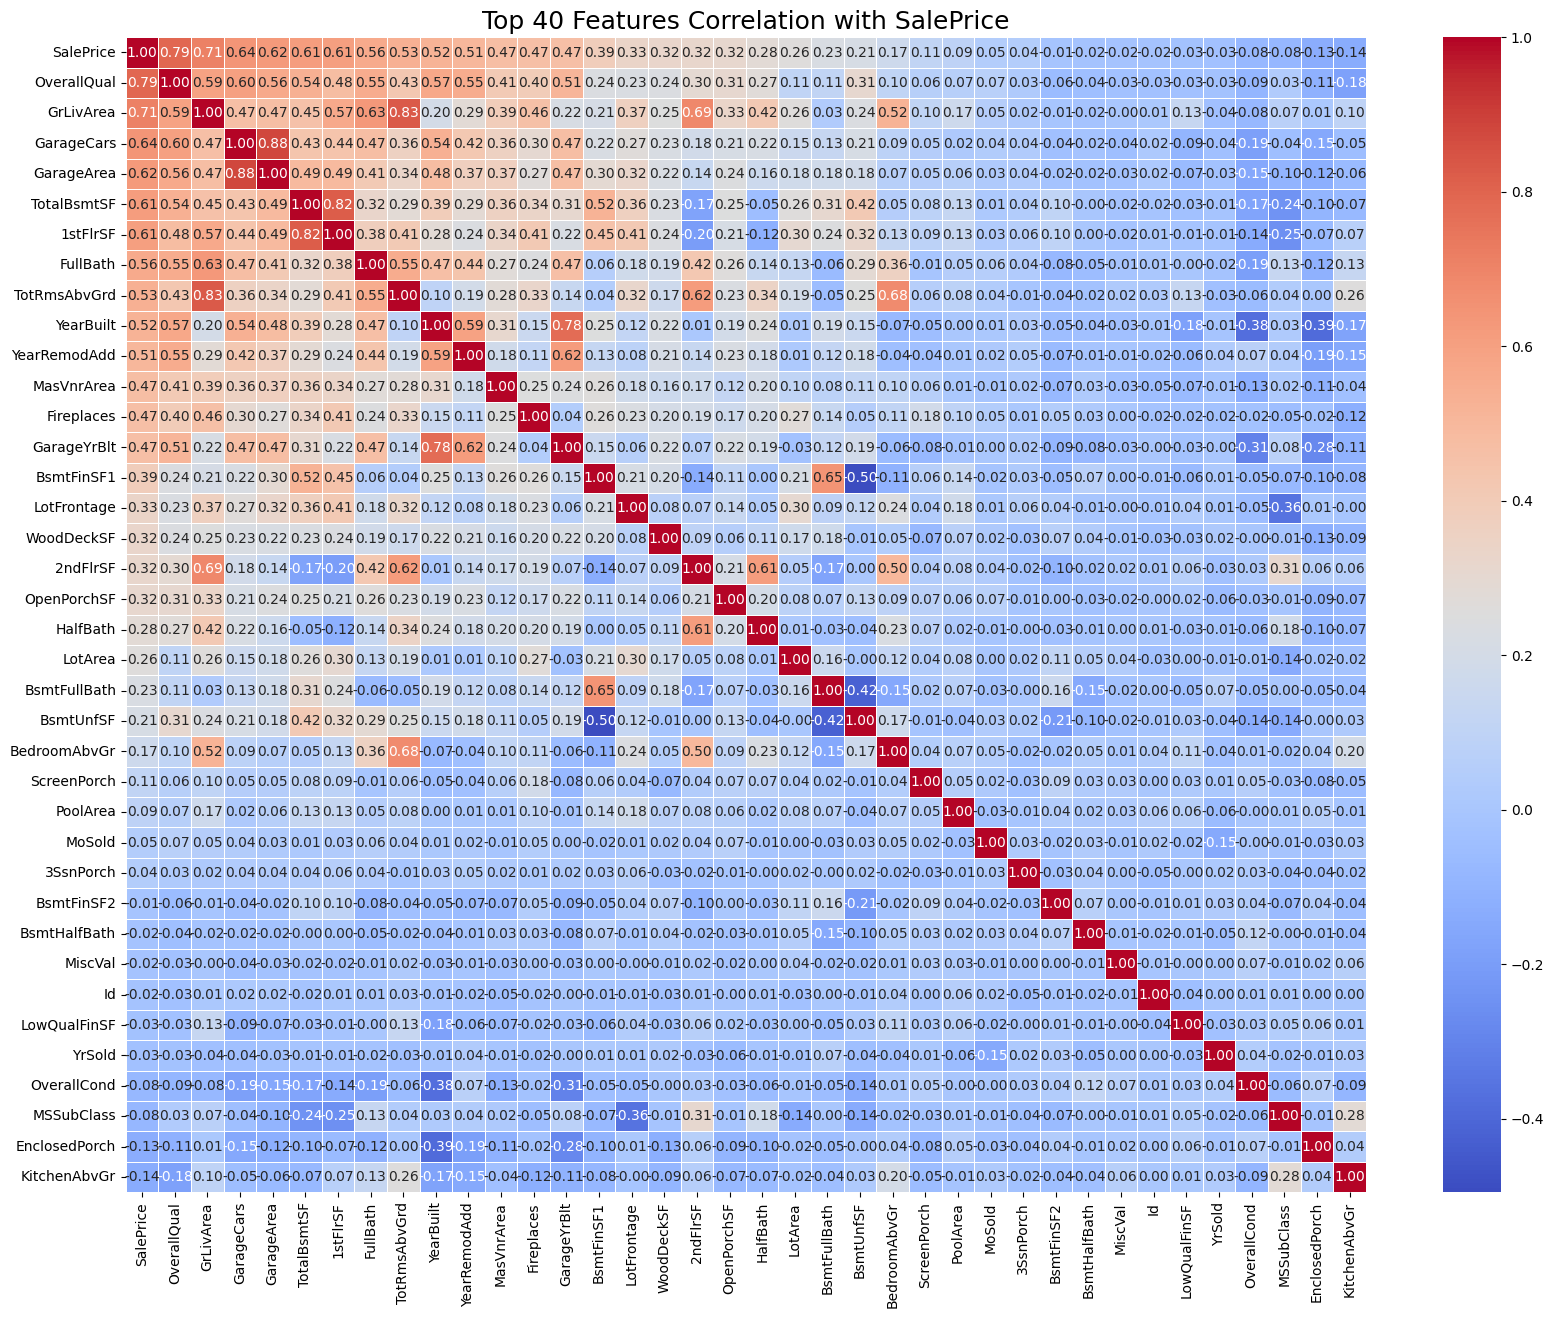

In [5]:
# 변수간 상관관계 확인
import seaborn as sns

# corr=train_df.corr()
# top_corr = train_df[corr.nlargest(40, 'SalePrice')['SalePrice'].index].corr()
# figure, ax1 = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(20,15)
# sns.heatmap(top_corr, annot=True, ax=ax1)

# 숫자형 변수만 선택하여 상관계수 계산
corr = train_df.select_dtypes(include=['number']).corr()

# SalePrice와 가장 상관관계가 높은 상위 40개 변수 선택
top_corr_features = corr.nlargest(40, 'SalePrice')['SalePrice'].index

# 선택한 변수들의 상관관계 행렬 생성
top_corr = train_df[top_corr_features].corr()

# 시각화 설정
plt.figure(figsize=(20, 15))
sns.heatmap(top_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# 제목 추가
plt.title("Top 40 Features Correlation with SalePrice", fontsize=18)

# 그래프 출력
plt.show()

목표변수 : SalePrice  
  
** 긍정적인 영향  
OverallQual (종합 품질)  
GrLivArea (거실 평방 피트)  
GarageCarS (차고의 차량 수용 가능)  
GarageArea (차고 크기)  
TotalBsmtSF (지하실 면적의 총 제곱 피트)  
1stFlrSF (1층 평방 피트)  
FullBath (지상 위에 있는 완전한 욕실)  
TotRmsAbvGrd (지상 위의 총 객실 수(욕실은 포함하지 않음))  
YearBuilt (건설 날짜)  
YearRemodAdd (리모델링 날짜)  
  
** 부정적 영향  
KitchenAbvGr (주방 수와 품질)  
EnclosedPorch (평방 피트의 닫힌 베란다 영역)  
MSSubClass (건물 클래스)  
OverallCond (전체 상태 등급)  
YrSold (판매 연도)  
  
이것 외
BsmtUnfSF (지하실의 미완성 평방 피트) x BsmtFinSF1 (1종 제곱피트 완성) 이 서로 음의 상관관계
명칭 참고 : https://wiki.datrics.ai/house-prices  


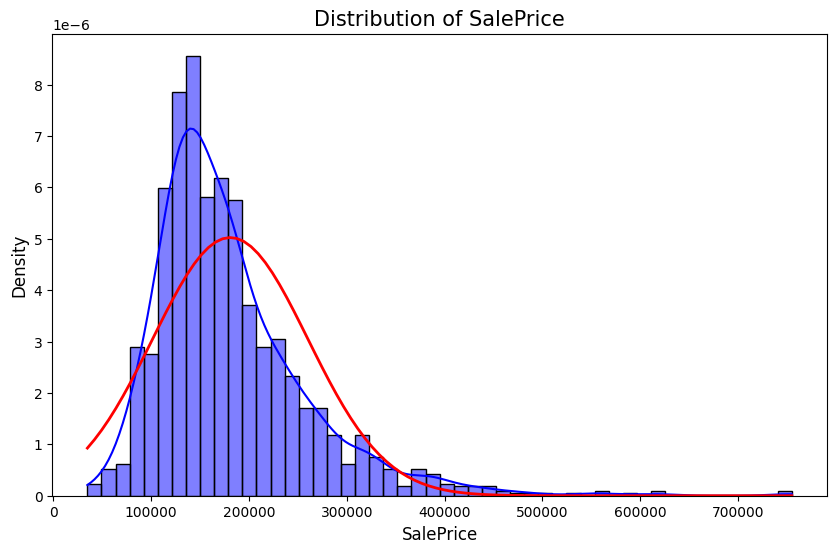

In [ ]:
# - **타겟값**(SalePrice) 분포 확인: 로그 변환을 고려(왜도가 클 때)
from scipy.stats import norm, skew

# SalePrice의 분포 확인
plt.figure(figsize=(10, 6))     # 그래프 크기를 가로 10, 세로 6으로 설정
sns.histplot(train_df['SalePrice'], kde=True, bins=50, stat="density", color="blue")

# 정규분포 곡선 추가
mu, sigma = norm.fit(train_df['SalePrice'])
x = np.linspace(min(train_df['SalePrice']), max(train_df['SalePrice']), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)  # 정규분포 곡선

plt.title("Distribution of SalePrice", fontsize=15)
plt.xlabel("SalePrice", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

sns.distplot()은 최신 Seaborn에서 sns.histplot()으로 대체됨  
  
scipy.stats.norm → 정규분포 곡선 추가  
scipy.stats.skew → 왜도(Skewness) 계산  
numpy → 로그 변환 시 사용 (np.log1p())  
  
kde=True : 커널 밀도 추정(KDE) 곡선 추가  (부드러운 곡선으로 데이터의 밀도를 표현)  
bins=50 : 히스토그램 구간을 50개로 설정  
stat="density" : 밀도 값을 기준으로 정규화  
color="blue" : 그래프 색상을 파란색으로 설정  
  
분포가 왼쪽으로 치우쳐져 있음. -> 왜도(Skewness)값이 1보다 크면 로그 변환을 고려  
왜도가 크면 정규분포에서 많이 벗어남  
머신러닝 모델은 정규분포에 가까울 수록 성능이 더 좋을 수 있음.  
  
참고 : https://wndofla123.tistory.com/83  



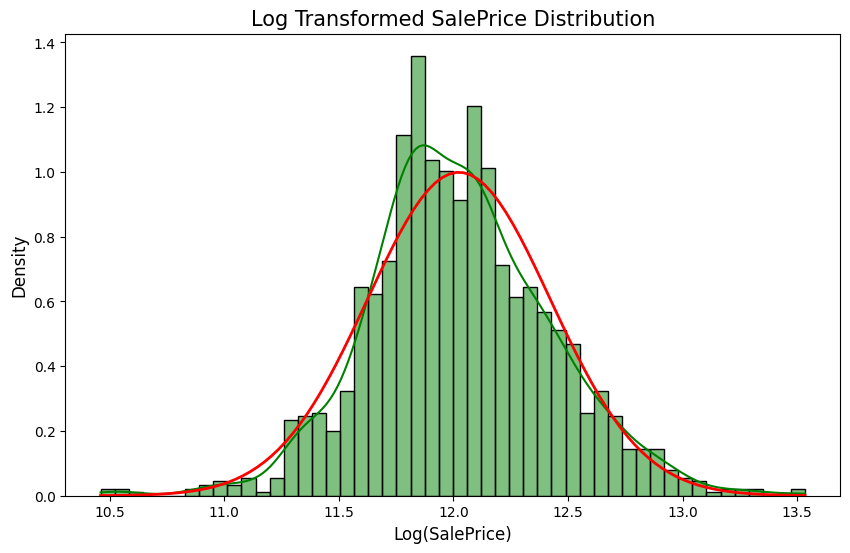

In [7]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

# 로그 변환 후 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=50, stat="density", color="green")

# 정규분포 곡선 추가
mu, sigma = norm.fit(train_df['SalePrice'])
x = np.linspace(min(train_df['SalePrice']), max(train_df['SalePrice']), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)

plt.title("Log Transformed SalePrice Distribution", fontsize=15)
plt.xlabel("Log(SalePrice)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

norm.fit() -> SalePrice 데이터의 평규(mu)과 표준편차(sigma)를 계산  
np.linspace() -> SalePrice의 최소값~최대값을 100개 구간으로 나눈 배열 생성
norm.pdf(x, mu, sigma) ->  정규분포 활률밀도함수(PDF) 계산
plt.plot() -> 그래프에 정규분포 곡선 추가
'r' -> 곡선을 빨간색으로 표시
linewidth=2 -> 선 두께 설정
plt.xlabel("SalePrice", fontsize=12) -> X축 라벨 설정
plt.ylabel("Density", fontsize=12) -> Y축 라벨 설정

로그 변환을 하면 큰 값이 줄어들고 분포가 정규분포에 가까워짐.  
SalePrice는 극단적으로 큰 값이 많아 오른쪽으로 치우친 분포를 가짐.
로그 변환을 하면 왜도가 줄어들고 데이터가 정규 분포에 가가워짐.
이렇게 하면 모델 학습이 더 잘되고, 예측 성능이 올라감.

log1p 참고 : https://go-for-data.tistory.com/entry/05-Regression-Log-Transformation#google_vignette  